In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# precision and recall


In [2]:
import numpy as np
from sklearn import metrics

# generate our results
y_pred = np.zeros(100, dtype=np.int32)
y_pred[:12] = 1
y = np.zeros(100)
y[:8] = 1
y[-2:] = 1

print("precision: {:g}".format(metrics.precision_score(y, y_pred)))
print("recall: {:g}".format(metrics.recall_score(y, y_pred)))
print(metrics.classification_report(y, y_pred))

precision: 0.666667
recall: 0.8
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        90
         1.0       0.67      0.80      0.73        10

    accuracy                           0.94       100
   macro avg       0.82      0.88      0.85       100
weighted avg       0.95      0.94      0.94       100



In [3]:
metrics.precision_score(y, y_pred)

0.6666666666666666

In [4]:
metrics.f1_score(y, y_pred)

0.7272727272727272

# probabilistic models

In [5]:
y_proba = np.linspace(0, 1, 1000)
y_pred = (y_proba > 0.5).astype(np.int32)

In [6]:
y = np.random.binomial(1, y_proba)

In [7]:
metrics.accuracy_score(y, y_pred)

0.754

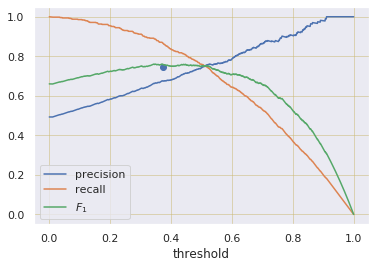

In [8]:
precision, recall, threshold = metrics.precision_recall_curve(y, y_proba)
f1_score = 2*precision*recall/(precision + recall)
threshold = np.hstack((0, threshold))

plt.plot(threshold, precision);
plt.plot(threshold, recall);
plt.plot(threshold, f1_score)
plt.scatter(0.373373, 0.746377)
plt.xlabel('threshold')
#plt.scatter(threshold, f1_score.max())
plt.grid(color='y', linewidth=.5)
plt.legend(['precision', 'recall', '$F_1$']);

# AUC
There is a tradeoff for precision and recall

Big Area Under the curve shows less tradeoff: 


In [9]:
print("precision-recall AUC: {}".format(metrics.auc(recall, precision)))
print("receiver-operator AUC: {}".format(metrics.roc_auc_score(y, y_proba)))

precision-recall AUC: 0.8414588985943549
receiver-operator AUC: 0.8354372118340164


# log loss
another metric for probabilistic classifiers
$$ -\sum_j \left[y_j \log(p_j) + (1-y_j)\log(1 - p_j) \right], $$

In [10]:
from sklearn.metrics import log_loss

In [14]:
p = np.linspace(0, 1-1e-6, 1000)
logloss = -(y*np.log(p) + (1-y)*np.log(1-p))
y = 1


/home/sk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [12]:
p

array([0.      , 0.001001, 0.002002, 0.003003, 0.004004, 0.005005,
       0.006006, 0.007007, 0.008008, 0.009009, 0.01001 , 0.011011,
       0.012012, 0.013013, 0.014014, 0.015015, 0.016016, 0.017017,
       0.018018, 0.019019, 0.02002 , 0.021021, 0.022022, 0.023023,
       0.024024, 0.025025, 0.026026, 0.027027, 0.028028, 0.029029,
       0.03003 , 0.031031, 0.032032, 0.033033, 0.034034, 0.035035,
       0.036036, 0.037037, 0.038038, 0.039039, 0.04004 , 0.041041,
       0.042042, 0.043043, 0.044044, 0.045045, 0.046046, 0.047047,
       0.048048, 0.049049, 0.05005 , 0.051051, 0.052052, 0.053053,
       0.054054, 0.055055, 0.056056, 0.057057, 0.058058, 0.059059,
       0.06006 , 0.061061, 0.062062, 0.063063, 0.064064, 0.065065,
       0.066066, 0.067067, 0.068068, 0.069069, 0.07007 , 0.071071,
       0.072072, 0.073073, 0.074074, 0.075075, 0.076076, 0.077077,
       0.078078, 0.079079, 0.08008 , 0.081081, 0.082082, 0.083083,
       0.084084, 0.085085, 0.086086, 0.087087, 0.088088, 0.089

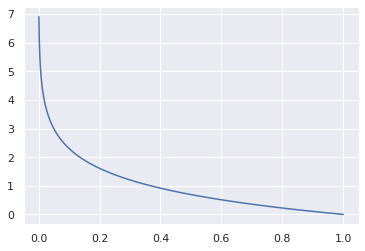

In [15]:
plt.plot(p, logloss)

# LOGISTIC REGRESSION (binary classifier)
$$ p_j = S\left( \sum_{i} X_{ji}\beta_i  + \beta_0 \right), $$
where
$$ S(x) = \frac{1}{1 + e^{-x}} $$

In [48]:
x  = np.linspace(-10, 10, 100)
s = 1/(1+np.exp(-x))

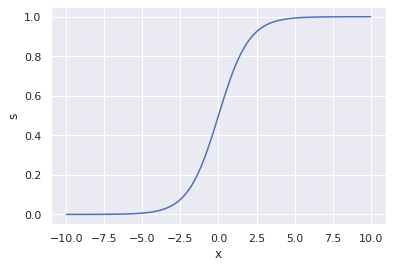

In [49]:
plt.plot(x, s);
plt.xlabel('x'); plt.ylabel('s');

$$ p_j = S\left( \sum_{i} X_{ji}\beta_i  + \beta_0 \right), $$
where
$$ S(x) = \frac{1}{1 + e^{-x}} $$

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [55]:
X, y = make_blobs(centers=[[1,1], [-1, -1]], cluster_std=1.5, random_state=0)

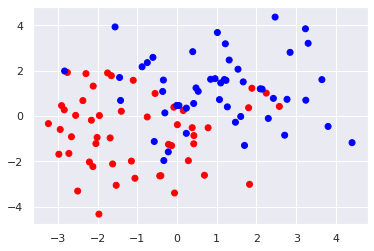

In [57]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr )

In [67]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X,y);

y_pred = clf.predict(X)
metrics.accuracy_score(y, y_pred)

0.84

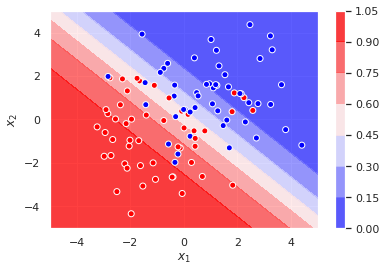

In [73]:
#construct a decison boundary
#what is the proba of  observtion to be in certain class

X1, X2 = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
y_proba = clf.predict_proba(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))[:, 1]
plt.contourf(X1, X2, y_proba.reshape(50, 50), cmap=plt.cm.bwr, alpha=0.75, vmin=0, vmax=0.95)
plt.colorbar()

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='white', cmap=plt.cm.bwr)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

1. LogisticRgression is a linear framework
2. LogisticRegression is LinearRegression counterpart for classification